In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

# Importing Data

## Reading data from a CSV file

In [2]:
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
#the shape of our data
print(df.shape)

(568454, 10)


`pd.read_csv` Reads a comma-separated values (csv) file into DataFrame.

## Taking a part from the data

In [3]:
df = df.head(500)
print(df.shape)

(500, 10)


- `df = df.head(n)` This function returns the first n rows for the object based on position
- Without a value of n it return the first 5 rows.

# Taking a look at the data

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Counting the scores

In [5]:
ax = df['Score'].value_counts()
print(ax)

Score
5    339
4     70
3     37
1     36
2     18
Name: count, dtype: int64


- `df['x'].values_counts()` return a **series** of counting values of x in descending order by default.
- In the example above it returns the number of occurrences of values of **Score**.
- A `panda.series` is a one dimensional ndarray

## Reordering the series

In [6]:
ax = df['Score'].value_counts().sort_index()
print(ax)

Score
1     36
2     18
3     37
4     70
5    339
Name: count, dtype: int64


- `Series.sort_index( inplace = False)` Returns a new Series sorted by label if *inplace* argument is `False`, otherwise updates the original series and returns None.

## Visualizing the series

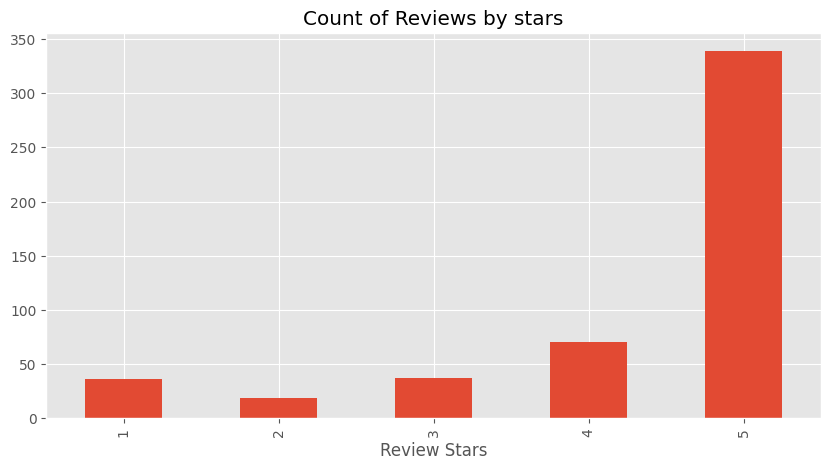

In [7]:
# visualizing the series using a bar diagram
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by stars', figsize=(10, 5))
# setting a title for x axis
ax.set_xlabel('Review Stars')
plt.show()

# Basic NLTK

## Selecting data from the DataFrame

In [8]:
example = df['Text']
print(example)

0      I have bought several of the Vitality canned d...
1      Product arrived labeled as Jumbo Salted Peanut...
2      This is a confection that has been around a fe...
3      If you are looking for the secret ingredient i...
4      Great taffy at a great price.  There was a wid...
                             ...                        
495    i rarely eat chips but i saw these and tried t...
496    This is easily the best potato chip that I hav...
497    Kettle Chips Spicy Thai potato chips have the ...
498    Okay, I should not eat potato chips, nor shoul...
499    I don't write very many reviews but I have to ...
Name: Text, Length: 500, dtype: object


In [9]:
example = df['Text'][0]
print(example)


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [10]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## Tokenization

In [11]:
tokens = nltk.word_tokenize(example)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


- `nltk.word_tokenize` is a function used to tokenize a text into individual words
- **tokenizing** a text means breaking the text into smaller parts for the purpose of making it easier for the machine to understand human language

## Part-of-speech-tagging

- Part-of-speech tagging is a natural language processing task that involves assigning grammatical categories to words in a given text.
- The goal of POS tagging is to determine the syntatic and grammatical structure of a sentence.
- Example: determining the grammatical structure of the following sentence  "The quick brown fox"
    1. Subject (S): "The quick brown fox"
    - Noun (N): "fox"
    - Adjective (Adj): "the quick brown"
    2. Predicate (P): "jumps over the lazy dog."
    - Verb (V): "jumps"
    - Prepositional Phrase (PP): "over the lazy dog."
        - Preposition (P): "over"
        - Article (Art): "the"
        - Adjective (Adj): "lazy"
        - Noun (N): "dog"

In [12]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

## Named Entity Recognition

**Named Entity Recognition (NER):** NER is a subtask of information extraction that focuses on identifying and classifying entities in text. Entities can include persons, organizations, locations, dates, percentages, and more.

In [13]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


- `ne_chunk` takes as input a list of tagged words, than identify and classify named entities in the input text.
- In the example above you can see that it identifies two words as ORGAIZATION
    - (ORGANIZATION Labrador/NNP)
    - (ORGANIZATION Vitality/NNP)

# VADER Seniment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.
## SentimentIntensityAnalyzer
- Is a class in NTLK based on the pre-trained model **VADER** 
- Using this calss we can get a sentimenet score to a piece of text, by providing us with three value positive, negative, neutral and a compound score.
    - positive for positive feelings.
    - negative for negative feeling
    - neutral if the text does not express neither positive or negative feelings
    - compound represents the overall sentiment of     the text.
    
## Bag of words approach
- Is the processes we used in this project
- Bag of words approach means that we represented the texts as unordered set of words, and we kept track of frequency of each word in another term we do not care about the order of words insted we focuse on the occurces of words.

## importing more tools

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Basic sentimentIntensityAnalyzer

In [15]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [16]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [17]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

## Using sentimentIntensityAnalyzer on our dataset

In [18]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
print(len(res))

  0%|          | 0/500 [00:00<?, ?it/s]

500


In [19]:
count = 0
for id, score in res.items():
    print(f"id : {id}, score: {score}")
    count += 1
    if( count == 10):
        break

id : 1, score: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
id : 2, score: {'neg': 0.079, 'neu': 0.853, 'pos': 0.068, 'compound': -0.1027}
id : 3, score: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
id : 4, score: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
id : 5, score: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}
id : 6, score: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883}
id : 7, score: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346}
id : 8, score: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487}
id : 9, score: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369}
id : 10, score: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}
